In [47]:
import seaborn as sns
titanic= sns.load_dataset('titanic')
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [48]:
df= titanic[['pclass','fare','survived','sex']]
# df.set_index('pclass')

df1= df.groupby('pclass').get_group(1)
df2= df.groupby('pclass').get_group(2)
df3= df.groupby('pclass').get_group(3)

In [37]:
df

,pclass,fare,survived,sex
0,3,7.2500,0,male
1,1,71.2833,1,female
2,3,7.9250,1,female
3,1,53.1000,1,female
4,3,8.0500,0,male
...,...,...,...,...
886,2,13.0000,0,male
887,1,30.0000,1,female
888,3,23.4500,0,female
889,1,30.0000,1,male


<AxesSubplot:xlabel='fare', ylabel='survived'>

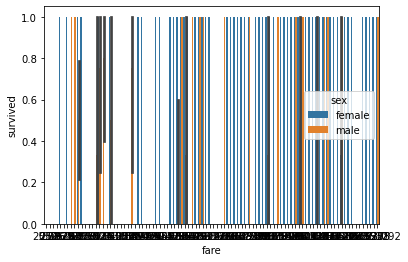

In [32]:
sns.barplot(x='fare',y='survived',hue='sex',data=df1)

In [82]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [52]:
import warnings
warnings.filterwarnings('ignore')
def fare_group(fare):
    cat=''
    if fare<8: cat='group1'
    elif 8<=fare<15: cat='group2'
    elif 15<=fare<31: cat='group3'
    else: cat='group4'
    return cat


df1['fare_cat']=df1['fare'].apply(lambda x: fare_group(x))
df2['fare_cat']=df2['fare'].apply(lambda x: fare_group(x))
df3['fare_cat']=df3['fare'].apply(lambda x: fare_group(x))

df1.head()

df1.set_index('pclass')

,fare,survived,sex,fare_cat,Ratio
pclass,,,,,
1,71.2833,1,female,group4,1
1,53.1000,1,female,group4,1
1,51.8625,0,male,group4,1
1,26.5500,1,female,group3,1
1,35.5000,1,male,group4,1
...,...,...,...,...,...
1,52.5542,1,female,group4,1
1,5.0000,0,male,group1,1
1,83.1583,1,female,group4,1


In [57]:
# 1등급 
df1['Ratio']=1

df_fare_cat1= df1.groupby('fare_cat')[['Ratio']].count()
df_fare_cat1

,Ratio
fare_cat,
group1,6
group3,48
group4,162


In [78]:
df_fare_cat1['Ratio'].sum()

216

In [58]:
# 2등급
df2['Ratio']=1

df_fare_cat2= df2.groupby('fare_cat')[['Ratio']].count()
df_fare_cat2

,Ratio
fare_cat,
group1,6
group2,88
group3,68
group4,22


In [79]:
df_fare_cat2['Ratio'].sum()

184

In [59]:
#3등급 

df3['Ratio']=1

df_fare_cat3= df3.groupby('fare_cat')[['Ratio']].count()
df_fare_cat3

,Ratio
fare_cat,
group1,229
group2,128
group3,93
group4,41


In [80]:
df_fare_cat3['Ratio'].sum()

491

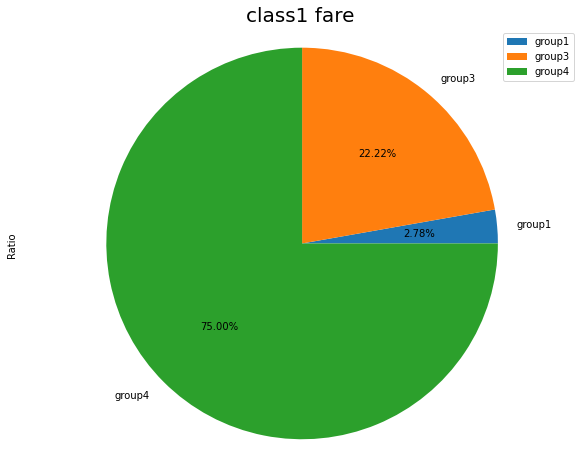

In [62]:
df_fare_cat1.Ratio.plot(kind='pie',
                       figsize=(10,8),
                       autopct='%.2f%%',
                       startangle=0)

plt.title('class1 fare',size=20)
plt.axis('equal')
plt.legend(labels=df_fare_cat1.index,loc='best')

In [81]:
print(216*0.0278)

6.0047999999999995


In [77]:
aa=df['fare'] == 0

aa1 = df[aa]

aa1

# fare==0  1등급 5명 /2등급 6명/ 3등급 4명

,pclass,fare,survived,sex
179,3,0.0,0,male
263,1,0.0,0,male
271,3,0.0,1,male
277,2,0.0,0,male
302,3,0.0,0,male
413,2,0.0,0,male
466,2,0.0,0,male
481,2,0.0,0,male
597,3,0.0,0,male
633,1,0.0,0,male


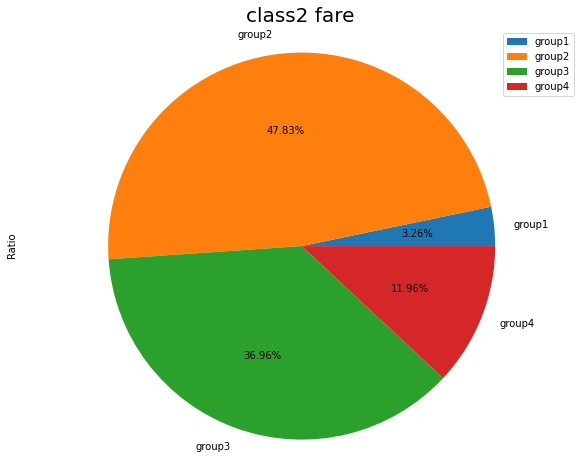

In [83]:
df_fare_cat2.Ratio.plot(kind='pie',
                       figsize=(10,8),
                       autopct='%.2f%%',
                       startangle=0)

plt.title('class2 fare',size=20)
plt.axis('equal')
plt.legend(labels=df_fare_cat2.index,loc='best')

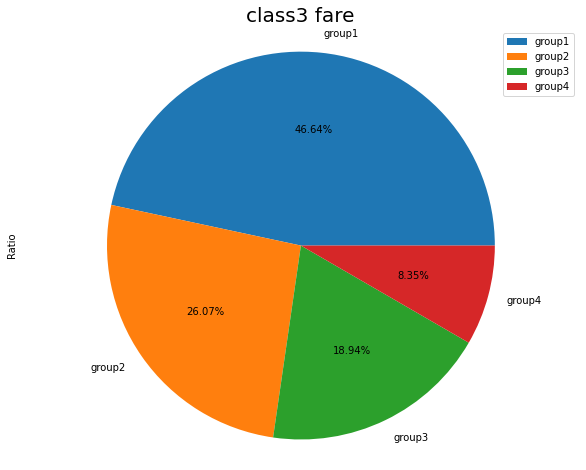

In [84]:
df_fare_cat3.Ratio.plot(kind='pie',
                       figsize=(10,8),
                       autopct='%.2f%%',
                       startangle=0)

plt.title('class3 fare',size=20)
plt.axis('equal')
plt.legend(labels=df_fare_cat3.index,loc='best')